In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
g = 9.81  # gravity (m/s^2)
alpha = np.radians(30)  # slope of the incline in radians
r = 0.1  # radius of the spheres (m)
m = 1.0  # mass of the spheres (kg)
h = 5.0  # height of the slope (m)

# Time parameters
dt = 0.05  # time step (s)
duration = 2.0  # duration of simulation (s)

# Moments of inertia
I_b = 2/5 * m * r**2  # Solid sphere
I_d = 2/3 * m * r**2  # Hollow sphere

In [87]:
def calculate_energies(Vx, w, I, yc, m, g):
    PE = m * g * yc
    KE_translational = 0.5 * m * Vx**2
    KE_rotational = 0.5 * I * w**2
    KE = KE_translational + KE_rotational
    TE = PE + KE
    return PE, KE, TE

In [88]:
# Modified update_state function to use the midpoint method
def update_state_midpoint(Sx, Vx, beta, w, I):
    # Step 1: Calculate initial acceleration and angular acceleration
    a_initial = g * np.sin(alpha) / (1 + I / (m * r**2))
    eps_initial = a_initial / r

    # Step 2: Update to midpoint values for velocity and angular velocity
    Vx_mid = Vx + a_initial * dt / 2
    w_mid = w + eps_initial * dt / 2

    # Step 3: Calculate acceleration and angular acceleration at midpoint
    a_mid = g * np.sin(alpha) / (1 + I / (m * r**2))
    eps_mid = a_mid / r

    # Step 4: Update actual state using midpoint values
    Sx += Vx_mid * dt
    Vx += a_mid * dt
    beta += w_mid * dt
    w += eps_mid * dt

    # Calculate x and y components of the position
    xc = Sx * np.cos(alpha)
    yc = h - Sx * np.sin(alpha)

    # Calculate energies
    PE, KE, TE = calculate_energies(Vx, w, I, yc, m, g)

    return Sx, Vx, beta, w, a_mid, eps_mid, xc, yc, PE, KE, TE


# Function to run the simulation with the midpoint method
def run_simulation_midpoint(I):
    time_steps = int(duration / dt)
    data = np.zeros((time_steps, 12))

    Sx = Vx = beta = w = 0

    for i in range(time_steps):
        t = i * dt
        Sx, Vx, beta, w, a, eps, xc, yc, PE, KE, TE = update_state_midpoint(Sx, Vx, beta, w, I)
        data[i] = [t, Sx, Vx, beta, w, a, eps, xc, yc, PE, KE, TE]

    return pd.DataFrame(data, columns=["t", "Sx", "Vx", "beta", "w", "a", "eps", "xc", "yc", "PE", "KE", "TE"])

Solid Sphere
       t        Sx        Vx       beta          w         a        eps  \
0   0.00  0.004379  0.175179   0.043795   1.751786  3.503571  35.035714   
1   0.05  0.017518  0.350357   0.175179   3.503571  3.503571  35.035714   
2   0.10  0.039415  0.525536   0.394152   5.255357  3.503571  35.035714   
3   0.15  0.070071  0.700714   0.700714   7.007143  3.503571  35.035714   
4   0.20  0.109487  0.875893   1.094866   8.758929  3.503571  35.035714   
5   0.25  0.157661  1.051071   1.576607  10.510714  3.503571  35.035714   
6   0.30  0.214594  1.226250   2.145938  12.262500  3.503571  35.035714   
7   0.35  0.280286  1.401429   2.802857  14.014286  3.503571  35.035714   
8   0.40  0.354737  1.576607   3.547366  15.766071  3.503571  35.035714   
9   0.45  0.437946  1.751786   4.379464  17.517857  3.503571  35.035714   
10  0.50  0.529915  1.926964   5.299152  19.269643  3.503571  35.035714   
11  0.55  0.630643  2.102143   6.306429  21.021429  3.503571  35.035714   
12  0.60  0.

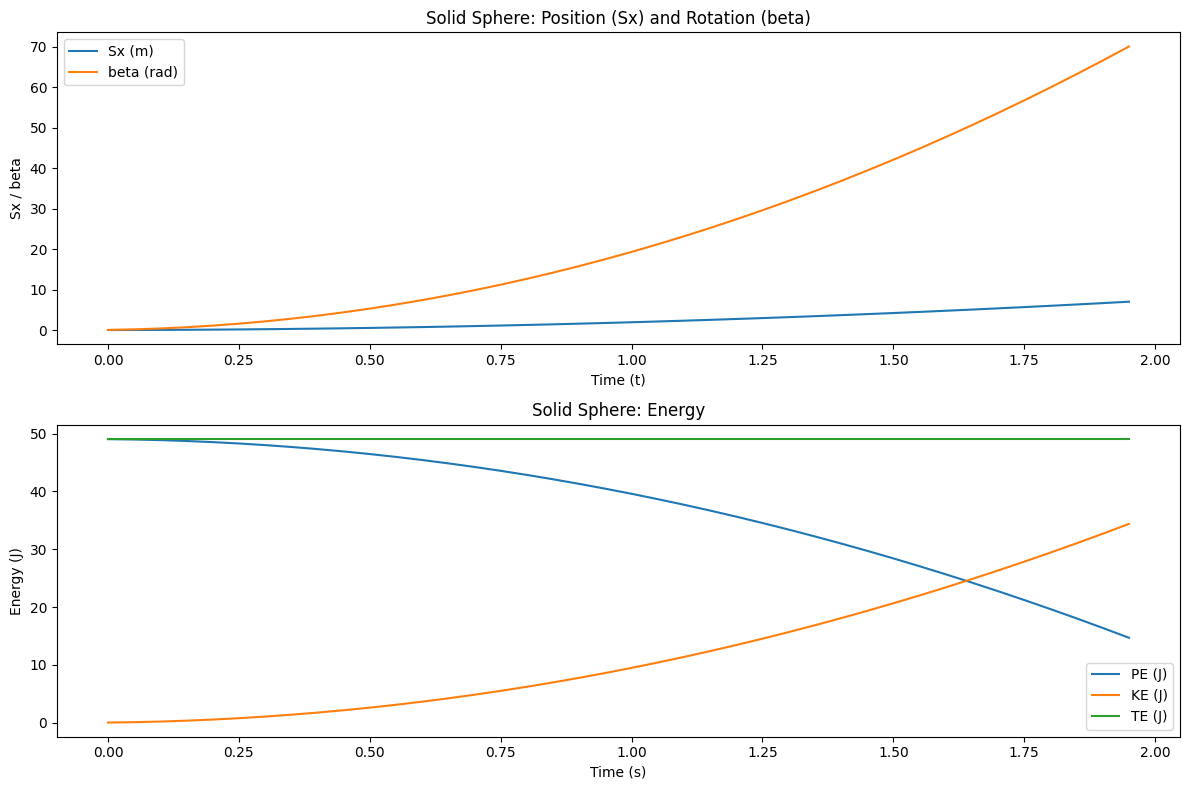

In [89]:
# Running the simulation for solid sphere using midpoint method 
df_solid_midpoint = run_simulation_midpoint(I_b)

# Display the DataFrame
print("Solid Sphere")
print(df_solid_midpoint)

# Plotting results for the solid sphere
plt.figure(figsize=(12, 8))

# Position and rotation for solid sphere
plt.subplot(2, 1, 1)
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["Sx"], label='Sx (m)')
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["beta"], label='beta (rad)')
plt.title('Solid Sphere: Position (Sx) and Rotation (beta)')
plt.xlabel('Time (t)')
plt.ylabel('Sx / beta')
plt.legend()

# Energy for solid sphere
plt.subplot(2, 1, 2)
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["PE"], label='PE (J)')
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["KE"], label='KE (J)')
plt.plot(df_solid_midpoint["t"], df_solid_midpoint["TE"], label='TE (J)')
plt.title('Solid Sphere: Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

plt.tight_layout()
plt.show()

Hollow Sphere
       t        Sx       Vx       beta        w      a    eps        xc  \
0   0.00  0.003679  0.14715   0.036788   1.4715  2.943  29.43  0.003186   
1   0.05  0.014715  0.29430   0.147150   2.9430  2.943  29.43  0.012744   
2   0.10  0.033109  0.44145   0.331087   4.4145  2.943  29.43  0.028673   
3   0.15  0.058860  0.58860   0.588600   5.8860  2.943  29.43  0.050974   
4   0.20  0.091969  0.73575   0.919687   7.3575  2.943  29.43  0.079647   
5   0.25  0.132435  0.88290   1.324350   8.8290  2.943  29.43  0.114692   
6   0.30  0.180259  1.03005   1.802588  10.3005  2.943  29.43  0.156109   
7   0.35  0.235440  1.17720   2.354400  11.7720  2.943  29.43  0.203897   
8   0.40  0.297979  1.32435   2.979788  13.2435  2.943  29.43  0.258057   
9   0.45  0.367875  1.47150   3.678750  14.7150  2.943  29.43  0.318589   
10  0.50  0.445129  1.61865   4.451288  16.1865  2.943  29.43  0.385493   
11  0.55  0.529740  1.76580   5.297400  17.6580  2.943  29.43  0.458768   
12  0.60  0

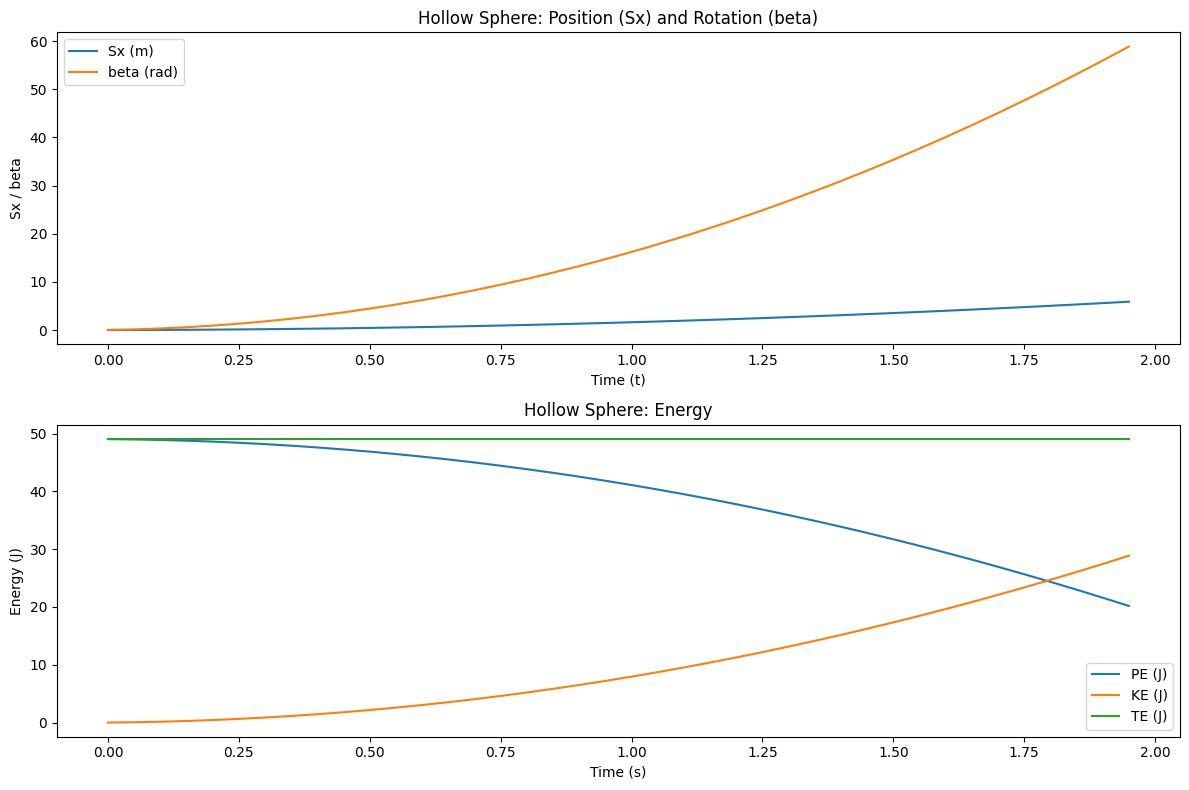

In [90]:
# Running the simulation for hollow sphere using midpoint method 
df_hollow_midpoint = run_simulation_midpoint(I_d)

# Display the DataFrame
print("Hollow Sphere")
print(df_hollow_midpoint)

# Plotting results for the hollow sphere
plt.figure(figsize=(12, 8))

# Position and rotation for hollow sphere
plt.subplot(2, 1, 1)
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["Sx"], label='Sx (m)')
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["beta"], label='beta (rad)')
plt.title('Hollow Sphere: Position (Sx) and Rotation (beta)')
plt.xlabel('Time (t)')
plt.ylabel('Sx / beta')
plt.legend()

# Energy for hollow sphere
plt.subplot(2, 1, 2)
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["PE"], label='PE (J)')
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["KE"], label='KE (J)')
plt.plot(df_hollow_midpoint["t"], df_hollow_midpoint["TE"], label='TE (J)')
plt.title('Hollow Sphere: Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

plt.tight_layout()
plt.show()